In [42]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2

In [43]:
# Helper function to display images
def display_image(img, title="Image", cmap=None):
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('on')
    plt.show()

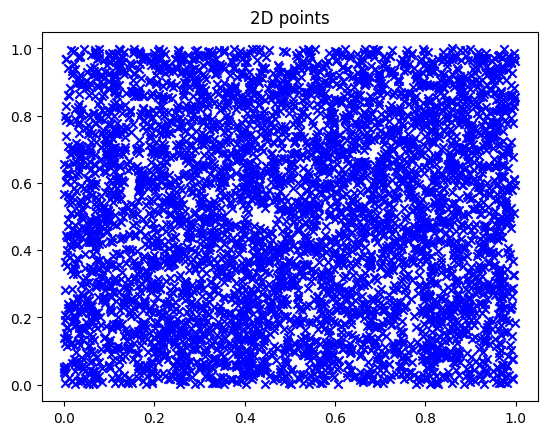

In [44]:
pt = np.random.rand(2,5000)
plt.scatter(pt[0, :], pt[1, :], c='b', marker='x')
plt.title("2D points")
plt.show()

In [45]:
# adding a third dimension
pt = np.vstack((pt, np.zeros(pt.shape[1])))

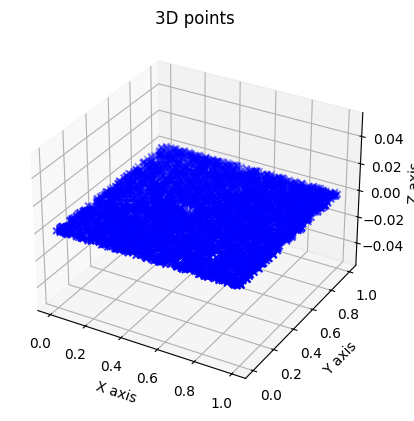

In [46]:
def plot_3d_scatter(pt, color='b'):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pt[0, :], pt[1, :], pt[2, :], c=color, marker='x')
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    plt.title("3D points")
    plt.show()
plot_3d_scatter(pt)


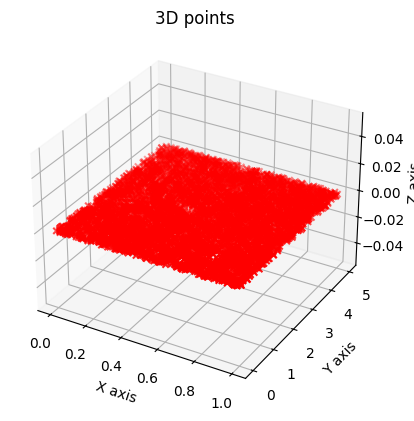

In [47]:
# multiply y axis by 5
pt_copy = pt.copy()
pt_copy[1, :] = pt_copy[1, :] * 5
plot_3d_scatter(pt_copy, color='r')

In [48]:
def eigen_build(observations):
    # Number of observations (n) and dimensionality (d)
    n = observations.shape[1]
    d = observations.shape[0]
    
    # Compute the mean of the observations
    org = np.mean(observations, axis=1)
    
    # Translate the observations by subtracting the mean
    obs_translated = observations - org[:, np.newaxis]
    
    # Compute the covariance matrix
    C = (1 / n) * np.dot(obs_translated, obs_translated.T)
    
    # Compute the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(C)
    
    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # Create the eigenmodel structure
    E = {
        'org': org,
        'vct': eigenvectors,
        'val': eigenvalues,
        'N': n
    }
    
    return E

In [60]:
eigen_model = eigen_build(pt)
print("org shape:", eigen_model['org'].shape)
print("vct shape:", eigen_model['vct'].shape)
print("val shape:", eigen_model['val'].shape)
print("N:", eigen_model['N'])
print("d:", eigen_model['vct'].shape[0])

org shape: (3,)
vct shape: (3, 3)
val shape: (3,)
N: 5000
d: 3
